green
red
blue


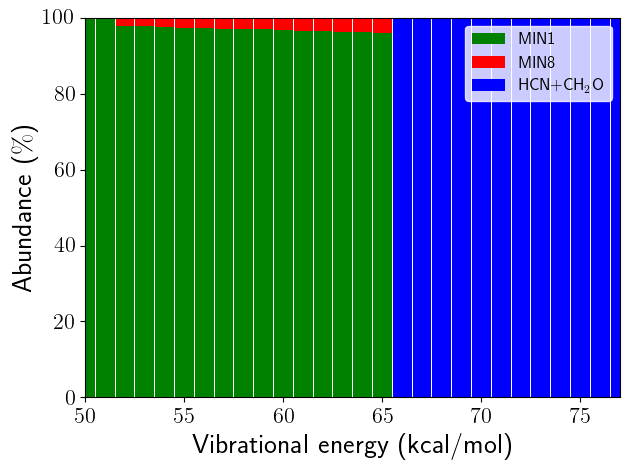

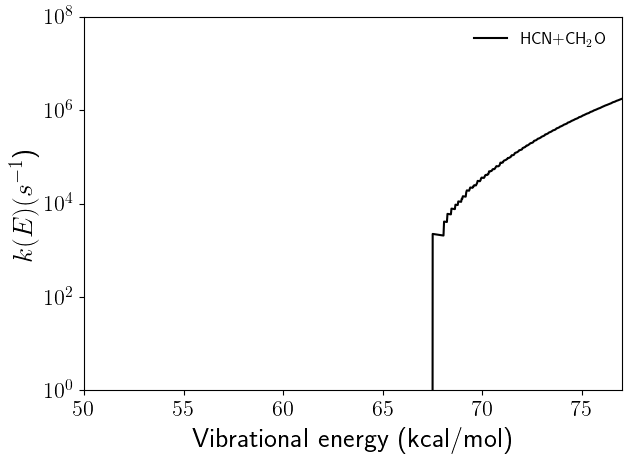

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from scipy.stats import linregress
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d


#reading the conductivities from a file
kin = pd.read_csv("kinetics.csv",sep=',')
X = np.array(kin['Energy'].values)
MIN1 = np.array(kin['MIN1'].values)
MIN8 = np.array(kin['MIN8'].values)
HCN_ = np.array(kin['HCN+CH2O'].values)

#X_ = np.linspace(X.min(), X.max(), 500)

#min1_interp = make_interp_spline(X,MIN1,k=3)
#min1_ = min1_interp(X_)


###############

species = X
sex_counts = {
    'MIN1': MIN1,
    'MIN8': MIN8,
    'HCN+CH$_{2}$O': HCN_,
}
width = 0.95  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(len(X))

color = ['green','red','blue']
i=0
for sex, sex_count in sex_counts.items():
    print(color[i])
    p = ax.bar(species, sex_count, width, label=sex, color=color[i], bottom=bottom)
    bottom += sex_count
    i+=1

    #ax.bar_label(p, label_type='center')
    #ax.bar_label(p, labels=None)


#plt.legend(loc=0,frameon=False,fontsize=12,edgecolor='white')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([50,77])
plt.ylim([0,100])
plt.xlabel(r'Vibrational energy (kcal/mol)',fontsize=20)
plt.ylabel(r'Abundance ($\%$)',fontsize=20)
#plt.show()

plt.legend(loc=1,fontsize=12,edgecolor='white')

############

#min8_interp = make_interp_spline(X,MIN8)
#min8_ = min8_interp(X_)

#hcn_interp = make_interp_spline(X,HCN_)
#hcn_ = hcn_interp(X_)

#min1_[min1_ > 100] = 100
#min8_[min8_ < 0] = 0


plt.rcParams['text.usetex'] = True

#plt.plot(X,MIN1, '-',color='black',label='MIN1')
#plt.plot(X,MIN8, '-',color='red',label='MIN8')
#plt.plot(X,HCN_, '-',color='blue',label='HCN+CH$_{2}$O')


#plt.xlabel(r'Vibrational energy (kcal/mol)',fontsize=20)
#plt.ylabel(r'Abundance ($\%$)',fontsize=20)

#plt.yscale('log')

#plt.legend(loc=1,frameon=False,fontsize=12)
#plt.xlim([50,77])
#plt.ylim([-1,101])
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.title('GLN',x=0.8, y=0.8, fontsize=16)
plt.tight_layout()
plt.savefig('kinetics.svg')
#plt.show()


plt.show()



#reading the conductivities from a file
k_ = pd.read_csv("k_hcn.csv",sep=',')
ene = np.array(k_['ene'].values)
k = np.array(k_['k'].values)

plt.rcParams['text.usetex'] = True

plt.plot(ene,k, '-',color='black', label='HCN+CH$_{2}$O')

plt.xlabel('Vibrational energy (kcal/mol)',fontsize=20)
plt.ylabel('$k(E) (s^{-1}$)',fontsize=20)

plt.xlim([50,77])
plt.ylim([1,1e8])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.title('GLN',x=0.8, y=0.8, fontsize=16)
plt.tight_layout()
plt.yscale("log")
plt.legend(loc=1,fontsize=12,edgecolor='white')
plt.savefig('rate.svg')


plt.show()
